<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_09_Filter_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# The dimensions of our input image
img_width = 180
img_height = 180
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv3_block4_out"
# Build a ResNet50V2 model loaded with pre-trained ImageNet weights
model = keras.applications.ResNet50V2(weights="imagenet", include_top=False)
# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

In [ ]:
def compute_loss(input_image, filter_index):
  activation = feature_extractor(input_image)
  # We avoid border artifacts by only involving non-border pixels in the loss.
  filter_activation = activation[:, 2:-2, 2:-2, filter_index]
  return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(img)
    loss = compute_loss(img, filter_index)
  # Compute gradients.
  grads = tape.gradient(loss, img)
  # Normalize gradients.
  grads = tf.math.l2_normalize(grads)
  img += learning_rate * grads
  return loss, img

In [ ]:
def initialize_image():
  # We start from a gray image with some random noise
  img = tf.random.uniform((1, img_width, img_height, 3))
  # ResNet50V2 expects inputs in the range [-1, +1].
  # Here we scale our random inputs to [-0.125, +0.125]
  return (img - 0.5) * 0.25

def visualize_filter(filter_index):
  # We run gradient ascent for 20 steps
  iterations = 30
  learning_rate = 10.0
  img = initialize_image()
  for iteration in range(iterations):
    loss, img = gradient_ascent_step(img, filter_index, learning_rate)
    
    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img

In [ ]:
def deprocess_image(img):
  # Normalize array: center on 0., ensure variance is 0.15
  img -= img.mean()
  img /= img.std() + 1e-5
  img *= 0.15
  
  # Center crop
  img = img[25:-25, 25:-25, :]
  
  # Clip to [0, 1]
  img += 0.5
  img = np.clip(img, 0, 1)
  
  # Convert to RGB array
  img *= 255
  img = np.clip(img, 0, 255).astype("uint8")
  return img

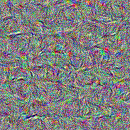

In [ ]:
from IPython.display import Image, display
loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("0.png", img)
display(Image("0.png"))

In [ ]:
# Compute image inputs that maximize per-filter activations
# for the first 64 filters of our target layer
all_imgs = []
for filter_index in range(64):
  print("Processing filter %d" % (filter_index,))
  loss, img = visualize_filter(filter_index)
  all_imgs.append(img)

# Build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

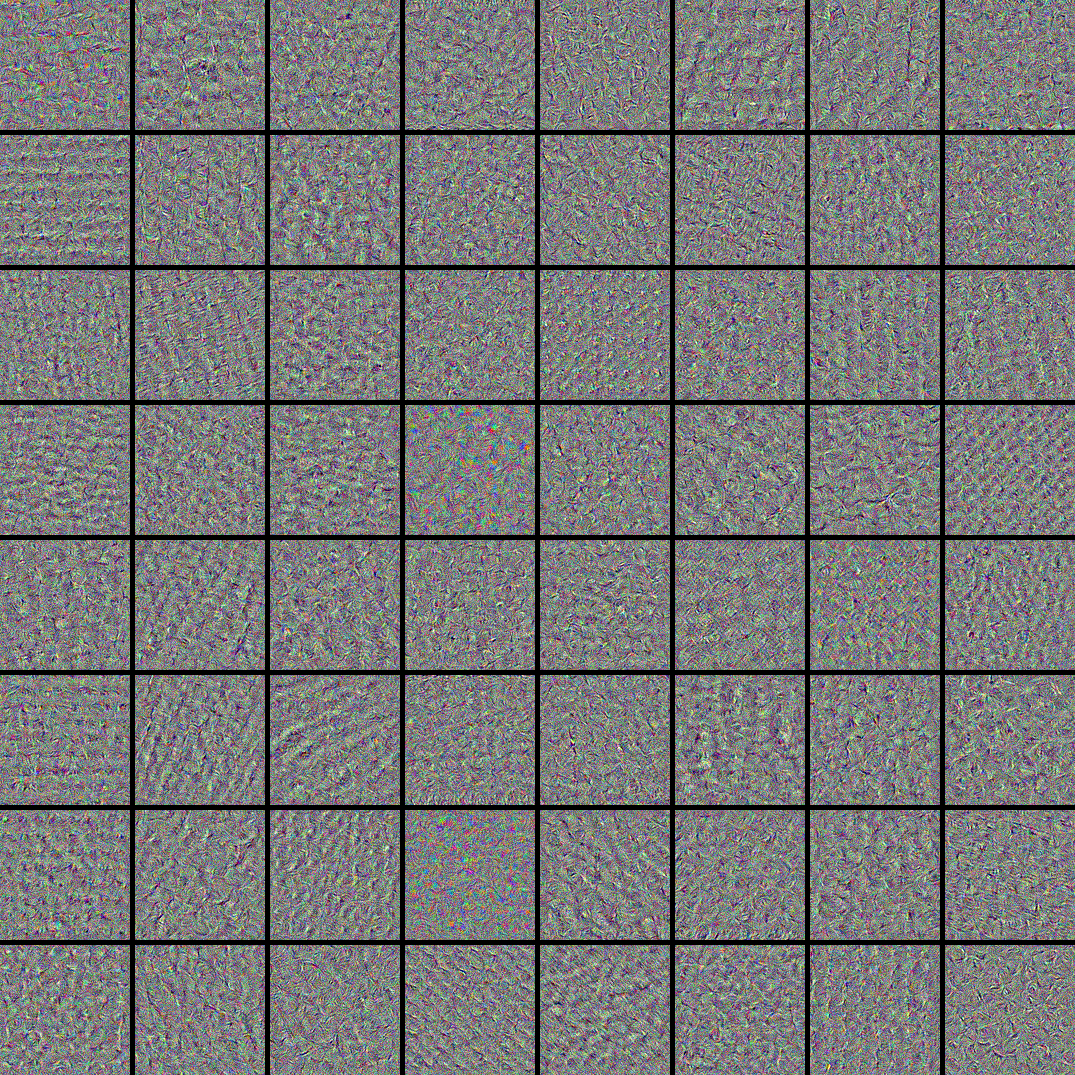

In [ ]:
# Fill the picture with our saved filters
for i in range(n):
  for j in range(n):
    img = all_imgs[i * n + j]
    stitched_filters[
                     (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
                     (cropped_height + margin) * j : (cropped_height + margin) * j
                     + cropped_height,
                     :,
    ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display

display(Image("stiched_filters.png"))


## 코끼리

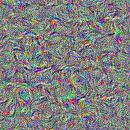

In [ ]:
from IPython.display import Image, display
loss, img = visualize_filter(0)
keras.preprocessing.image.save_img("elephant2.jpg", img)
display(Image("elephant2.jpg"))

In [ ]:
# Compute image inputs that maximize per-filter activations
# for the first 64 filters of our target layer
all_imgs = []
for filter_index in range(64):
  print("Processing filter %d" % (filter_index,))
  loss, img = visualize_filter(filter_index)
  all_imgs.append(img)

# Build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [ ]:
from tensorflow.keras.applications import VGG16 
from keras import backend as K
model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output 
loss = K.mean(layer_output[:, :, :, filter_index])

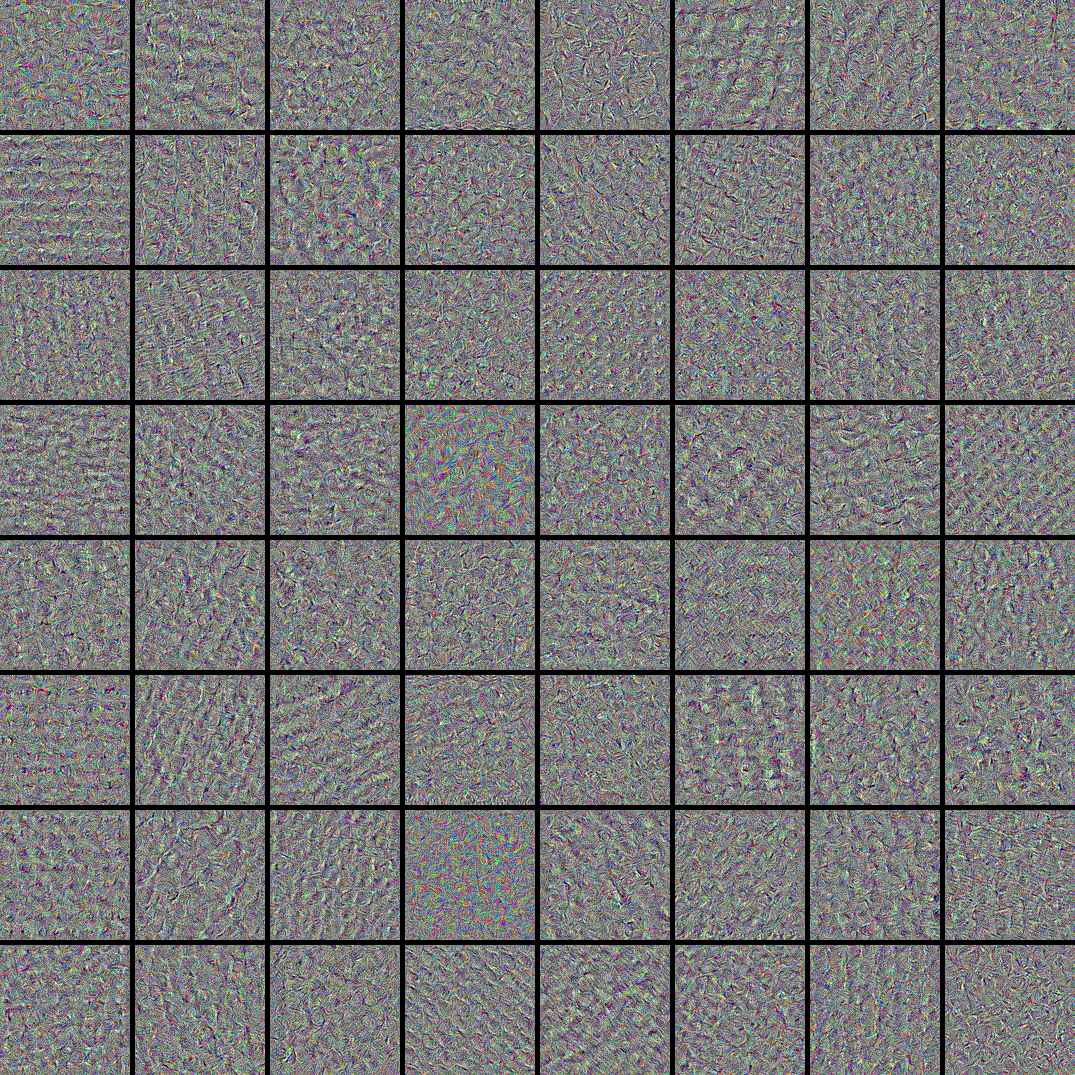

In [ ]:
# Fill the picture with our saved filters
for i in range(n):
  for j in range(n):
    img = all_imgs[i * n + j]
    stitched_filters[
                     (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
                     (cropped_height + margin) * j : (cropped_height + margin) * j
                     + cropped_height,
                     :,
    ] = img
keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

from IPython.display import Image, display

display(Image("stiched_filters.png"))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
# The local path to our target image
img_path = 'creative_commons_elephant.jpg'
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [ ]:
 preds = model.predict(x)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
print('Predicted:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.89544886), ('n01871265', 'tusker', 0.09967599), ('n02504013', 'Indian_elephant', 0.004639555)]


In [ ]:
 np.argmax(preds[0])

386

In [ ]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

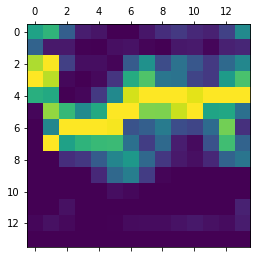

In [ ]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0) 
heatmap /= np.max(heatmap, 0) 
plt.matshow(heatmap)

In [ ]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('elephant2.jpg', superimposed_img)

True